In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


C:\Users\eitan\AppData\Local\Temp\ipykernel_47980\3371171623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Outline of Project:

We will assign a numeric score between 1 and 10 for each of the following six dimensions:
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in
general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about
the topic? Would a reader who already knew about the topic feel like s/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that
would give a lagging reader additional help on specific topics, or an advanced reader the ability to
dive more deeply into a specific application area or technique?
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand
the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people
actually read through the entire thing



**Introduction**
The Federal Bureau of Investigation reported 6,263 hate crimes in the US in 2016, 7,864 in 2019, and 11,613 in 2022--an 85% increase over six years. In response to an alarming surge in hate crimes across the nation, we present a comprehensive model aimed at tracking and analyzing this disturbing trend. The escalating incidence of hate-motivated offenses underscores the urgent need for proactive measures to understand the trends so they can be addressed. Our model incorporates 



**The Data**
This tutorial utilizes a dataset acquired from the Anti-Defamation League. The HEATMapData (1).csv file contains 51,870 hate crimes between 2016 and 2023. Each hate crime is identified based on some of the following categories: ID, Date, City, State, Type, Ideology, Subideology, Group, Description, Image. For the purpose of this study we are considering Date (when the incident was reported), State (where the incident occurred), Type (category of hate crime, further defined below), and Description (what specifically the incident was). In addition to not requiring the other columns for this particular study, these columns were all completed for every data entry.

The Types of incidents identified in this study are as follows: Antisemitic Incidents (including vandalism, harassment, and assault), Anti-LGBTQ+ (including vandalism, harassment, and assault), White Supremacist Incidents, Extremist Incidents, and Terrorist Incidents (including plots and attacks). Any incident can be labled with one or more of these Types. 

Before beginning data analysis and prediction, we have cleaned the data to remove unneeded columns and to combine similar categories for better representation of types of hate crimes. Another minor change was made, with a new column of Year being added based on the Date column for easier data management and comparisons further on. 

## Data Collection 


In [2]:
#Load from csv file
file_path = 'HEATMapData (1).csv'

#read into a DataFrame
all_data = pd.read_csv(file_path)

#Display the DataFrame
print(all_data)


          id        date              city state  \
0      54426  12/31/2023     San Francisco    CA   
1      54432  12/31/2023         Baltimore    MD   
2      54433  12/31/2023       Jersey City    NJ   
3      55018  12/31/2023          Beaumont    TX   
4      55026  12/31/2023           Houston    TX   
...      ...         ...               ...   ...   
51865    758     01/2016            Denver    CO   
51866    851     01/2016  Evesham Township    NJ   
51867    868     01/2016     East Falmouth    MA   
51868    896     01/2016   Fort Lauderdale    FL   
51869    923     01/2016        Framingham    MA   

                                  type ideology  subideology group  \
0       Antisemitic Incident:Vandalism      NaN          NaN   NaN   
1       Antisemitic Incident:Vandalism      NaN          NaN   NaN   
2       Antisemitic Incident:Vandalism      NaN          NaN   NaN   
3      Antisemitic Incident:Harassment      NaN          NaN   NaN   
4      Antisemitic Incide

#### Data Cleaning 

In [5]:
# Remove later--for temporary checks


# Print column titles
column_names = all_data.columns.tolist()
print(column_names)

# Check for missing values
missing_values = all_data.isnull().sum()
print("Missing Values:")
print(missing_values)

#SHOULD DO SMN HERE TO ADDRESS THE MISSING DATA. IN THIS CASE MAYBE JUST DROP THE CATEGORIES WITH MISSING DATA B/C IRRELEVANT. 



['id', 'date', 'city', 'state', 'type', 'ideology', 'subideology', 'group', 'description', 'image']
Missing Values:
id                 0
date               0
city               0
state              0
type               0
ideology       22293
subideology    51870
group          22993
description        0
image          43822
dtype: int64


## Data Processing

In [6]:
# Save only the needed columns

only_relevant = all_data[['date','state', 'type', 'description']]
print(only_relevant[['date']])


# Check for missing values
new_missing_values = only_relevant.isnull().sum()
print("New Missing Values:")
print(new_missing_values)

             date
0      12/31/2023
1      12/31/2023
2      12/31/2023
3      12/31/2023
4      12/31/2023
...           ...
51865     01/2016
51866     01/2016
51867     01/2016
51868     01/2016
51869     01/2016

[51870 rows x 1 columns]
New Missing Values:
date           0
state          0
type           0
description    0
dtype: int64


In [7]:
# Create new column of "data_year"
only_relevant['date'] = pd.to_datetime(only_relevant['date'], errors='coerce')

# Extract year and create a new column
only_relevant['data_year'] = only_relevant['date'].dt.year



print(only_relevant)

            date state                             type  \
0     2023-12-31    CA   Antisemitic Incident:Vandalism   
1     2023-12-31    MD   Antisemitic Incident:Vandalism   
2     2023-12-31    NJ   Antisemitic Incident:Vandalism   
3     2023-12-31    TX  Antisemitic Incident:Harassment   
4     2023-12-31    TX  Antisemitic Incident:Harassment   
...          ...   ...                              ...   
51865        NaT    CO  Antisemitic Incident:Harassment   
51866        NaT    NJ   Antisemitic Incident:Vandalism   
51867        NaT    MA  Antisemitic Incident:Harassment   
51868        NaT    FL  Antisemitic Incident:Harassment   
51869        NaT    MA  Antisemitic Incident:Harassment   

                                             description  data_year  
0      An individual vandalized the building of a Jew...     2023.0  
1      A sign calling for the return of Israeli hosta...     2023.0  
2      A swastika and the words, "Don't be Jewish" we...     2023.0  
3      A sy

C:\Users\eitan\AppData\Local\Temp\ipykernel_39492\1709362749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_relevant['date'] = pd.to_datetime(only_relevant['date'], errors='coerce')
C:\Users\eitan\AppData\Local\Temp\ipykernel_39492\1709362749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_relevant['data_year'] = only_relevant['date'].dt.year


## Exploratory Data Analysis:




### Data Exploration and Visualization:

general hate crimes  
-hate crimes by category 

-hate crimes over the years 

-hate crimes in diff agencies
 
-hate crimes per state 


Conduct further exploratory data analysis to gain insights into the characteristics of hate crimes. This can involve creating additional visualizations, such as bar plots, pie charts, or heatmaps, to analyze different aspects of the data such as demographics of victims and perpetrators, types of crimes, locations, and time trends.


-overall hate crime increase over the years 
-can make a separate dataframe with just overall numbers per year in any category and find other data to account for it 

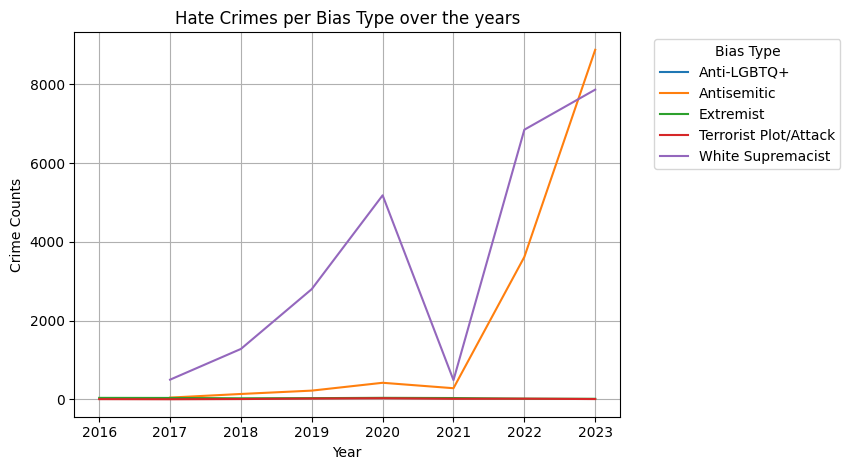

In [13]:
og_expand = only_relevant.assign(type=only_relevant['type'].str.split(', ')).explode('type')
expanded_data = og_expand.assign(type=only_relevant['type'].str.split(';')).explode('type')

#Combine the below categories
def map_categories(category):
    if "Anti-LGBTQ+" in category:
        return "Anti-LGBTQ+"
    elif "Antisemitic" in category:
        return "Antisemitic"
    elif "White Supremacist" in category:
        return "White Supremacist"
    elif "Extremist" in category:
        return "Extremist"
    else:
        return category

expanded_data['type'] = expanded_data['type'].apply(map_categories)

crime_counts = expanded_data.groupby(['data_year', 'type']).size().reset_index(name='count_of_crimes')

pivot_table = crime_counts.pivot(index='data_year', columns='type', values='count_of_crimes')

for category in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[category], label=category)

plt.title('Hate Crimes per Bias Type over the years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()

plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### Top 5 bias categories - look for trends 
idk if this is even necessary?

4        White Supremacist
3    Terrorist Plot/Attack
2                Extremist
1              Antisemitic
0              Anti-LGBTQ+
Name: type, dtype: object


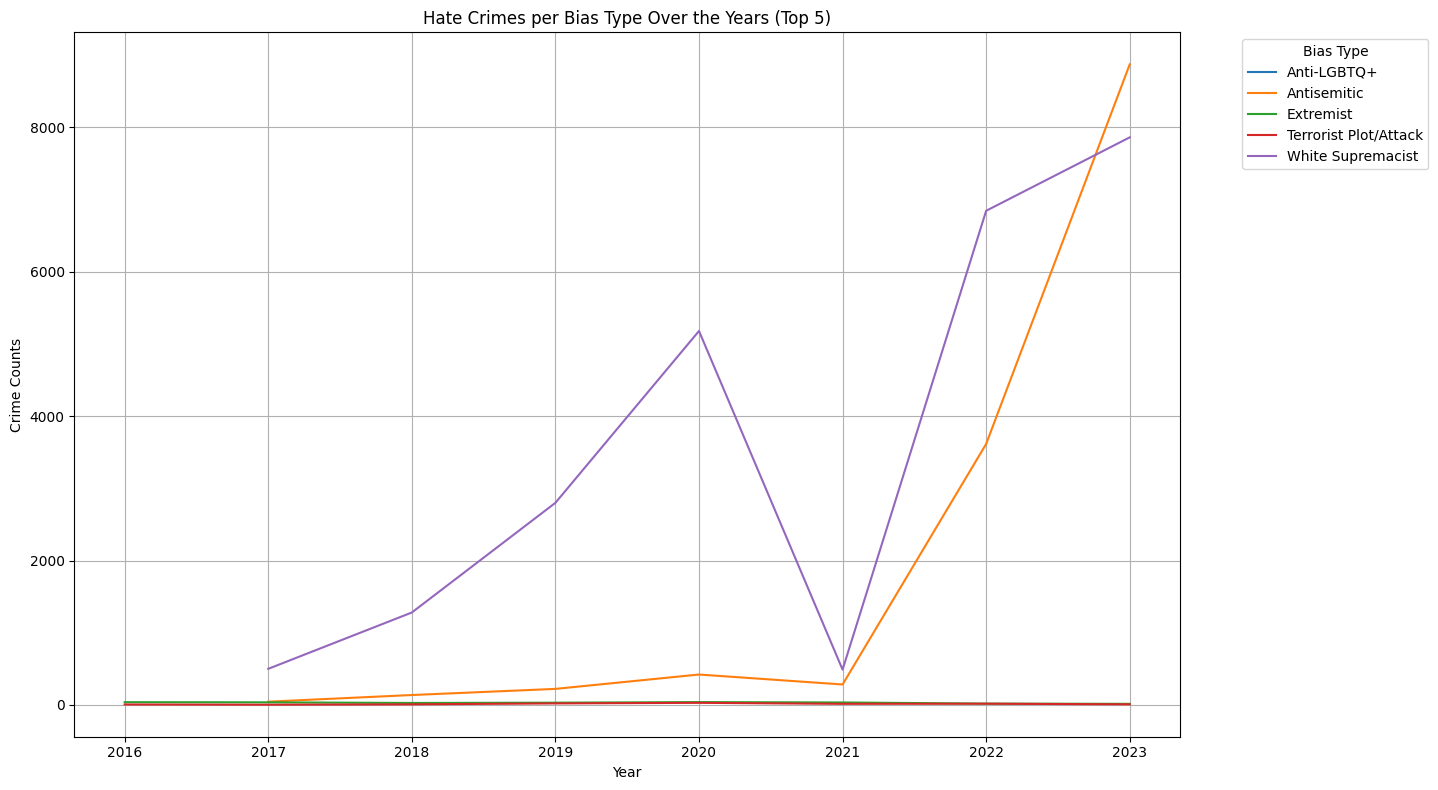

In [14]:
#THE TOP 5 BIAS CATEGORIES. I THOUGHT IT COULD BE COOL TO DO SMN WITH IT. can talk about the jewish population in comparison to others? 
crime_counts = expanded_data.groupby('type').size().reset_index(name='count_of_crimes')

# Sort the DataFrame by count_of_crimes in descending order
crime_counts_sorted = crime_counts.sort_values(by='type', ascending=False)

# Select the top 5 bias categories
top_5_bias_categories = crime_counts_sorted.head(5)['type']
print(top_5_bias_categories)

# Filter the expanded_data DataFrame to include only the rows with the top 5 bias categories
top_5_data = expanded_data[expanded_data['type'].isin(top_5_bias_categories)]
# Group the filtered data by 'data_year' and 'type' and count the number of hate crimes for each group
crime_counts_top_5 = top_5_data.groupby(['data_year', 'type']).size().reset_index(name='count_of_crimes')

# Pivot the DataFrame to have 'data_year' as the index, 'type' as the columns, and the count of crimes as the values
pivot_table_top_5 = crime_counts_top_5.pivot(index='data_year', columns='type', values='count_of_crimes')

# Plotting
plt.figure(figsize=(12, 8))

for category in pivot_table_top_5.columns:
    plt.plot(pivot_table_top_5.index, pivot_table_top_5[category], label=category)

plt.title('Hate Crimes per Bias Type Over the Years (Top 5)')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Antisemetism 

Our topic of interest.
Provide visualization for it and then summarize and report after. 

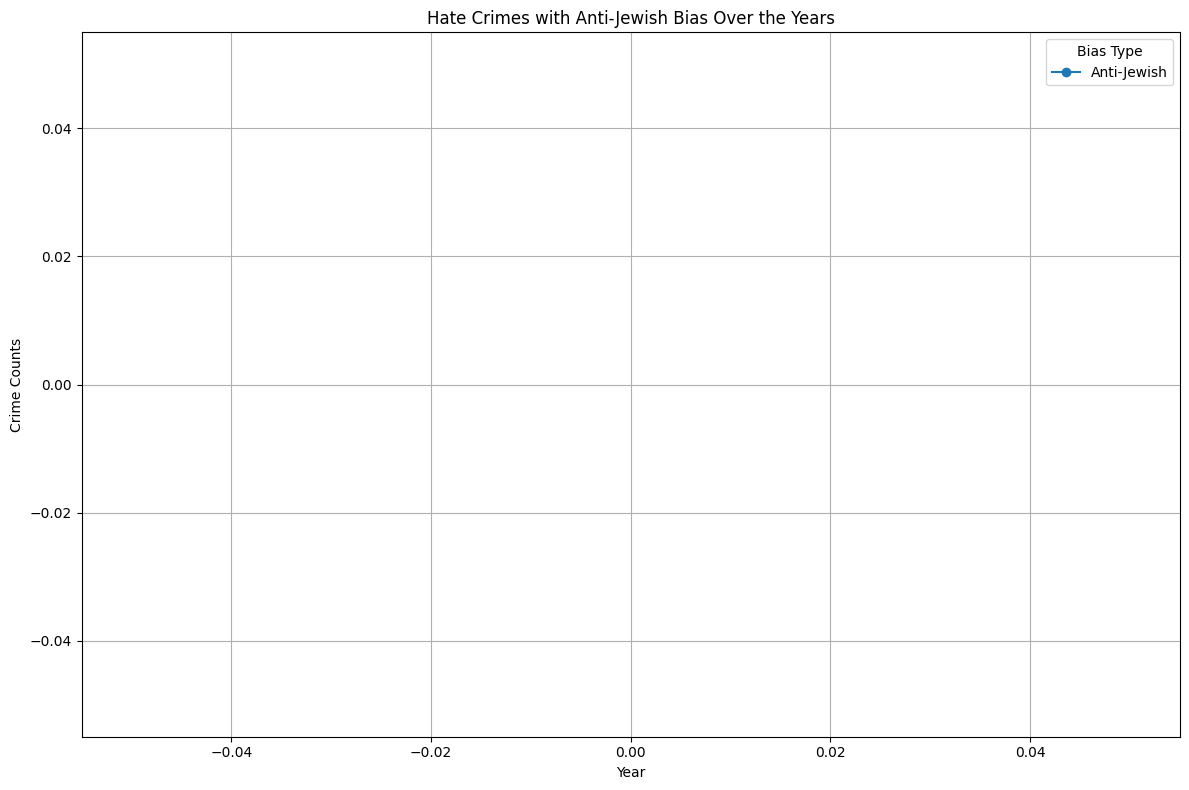

In [15]:
# Filter the expanded_data DataFrame to include only the rows with the "Anti-Jewish" bias category
anti_jewish_data = expanded_data[expanded_data['type'] == '']

# Group the filtered data by 'data_year' and count the number of hate crimes for each year
crime_counts_anti_jewish = anti_jewish_data.groupby('data_year').size().reset_index(name='count_of_crimes')

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(crime_counts_anti_jewish['data_year'], crime_counts_anti_jewish['count_of_crimes'], marker='o', label='Anti-Jewish')

plt.title('Hate Crimes with Anti-Jewish Bias Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Bias Type')
plt.show()

#maybe after this we can make a linear regression model to predict the number of antisemetic acts that would occur in 2023-2024


#Maybe here we can import data specifically for antisemetic acts in 2023 & 2024 

#its also worth noting historical context? 


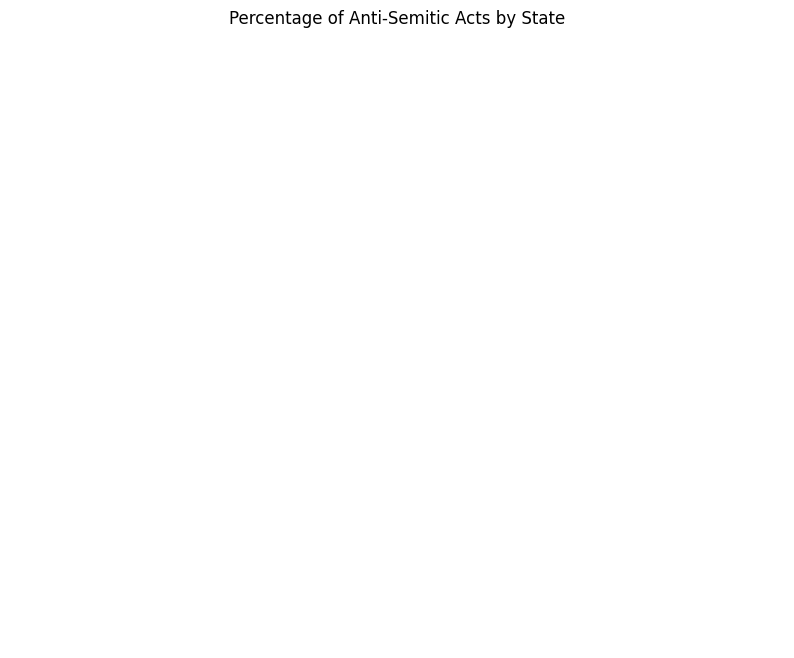

In [16]:
#per state
anti_semitic_data = only_relevant[all_data['type'] == 'Anti-Semitic']

# Group the filtered data by state and count the number of incidents in each state
antisemitic_per_state = anti_semitic_data['state'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
antisemitic_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Anti-Semitic Acts by State')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Analysis, hypothesis testing, & ML

Formulate hypotheses about hate crimes based on your EDA findings. For example, you may hypothesize that hate crimes are more prevalent in certain regions or during specific time periods.

Use statistical tests or machine learning algorithms to test these hypotheses and build predictive models if applicable. For example, you could use classification algorithms to predict the likelihood of hate crimes based on demographic and socio-economic factors.

In [ ]:
#Build Regression Model 

## Insight & Policy Decision
